# Введение. Возможности и ограничения изученных архитектур.

В первой части курса мы рассмотрели следующие архитектуры:
1. FCNN - полносвязные нейронные сети, нейронные сети прямого распространения, прецептроны
2. CNN - сверточные нейронные сети (YOLO, AlexNet, U-Net)
3. RNN - реккурентные нейронные сети (LSTM, GRU)
4. AE - Автоэнкодеры 
5. DNNs - Дифузионные модели ?

Рассмотрим достоинства и недостатки этих моделей на примере задач обработки текста.

*Как область ML, NLP выходит за рамки нашего курса, однако понять материал будет проще на этом примере. Кроме того, LLM теперь всюду, и знать базовые принципы их работы полезно*

## 1. Проблемы классических архитектур в задачах обработки языка.

Мы разберем недостатки классических архитектур на примере 2х классических задач.

**Задача машинного перевода**

Машинный перевод — это задача, которая заключается в автоматическом переводе текста с одного языка на другой. 

Рассмотрим ключевые компоненты этой задачи
1. *Входные данные*: 

    Исходный текст на языке $L_1$, который необходимо перевести. Обозначим его как $X = (x_1, x_2, \ldots, x_n)$, где $x_i$ — это слова или токены в предложении.

2. *Выходные данные*: 

    Переведённый текст на языке $L_2$. Обозначим его как $Y = (y_1, y_2, \ldots, y_m)$, где $y_j$ — это слова или токены в переведённом предложении.

3. *Модель перевода*:

    Отображает исходный текст $X$ на языке $L_1$ в грамматически и стилистически-правильный перевод $Y$ на языке $L_2$.
    $$\mathcal{M}: X\in L_1 \to Y\in L_2$$

4. *Данные для обучения*:

    Переводная литература, словари, синтетические данные на основе существующих моделей.

Как только мы поставили задачу таким образом, немедленно возникает несколько проблем:

1. *Векторное представление текста*:

    Модели машинного обучения оперируют числами, подать на их вход текст напрямую невозможно. Нужно научиться формировать какое-то векторное представление для текста, т.е. выполнить его *векторизацию*. Эта задача решается в 2 этапа: первый называется *токенизация*, в нем текст разбивается на некоторые минимальные единицы - *токены*. Второй этап - сопоставить токенам вектора в неком абстрактном пространстве - получить эмбеддинги токенов (калька с англ. embedding - вложение). Также нужно уметь восстанавливать текст из этих эмбеддингов. Мы детальнее рассмотрим вопрос создания векторных представлений текста и изображений позже.

    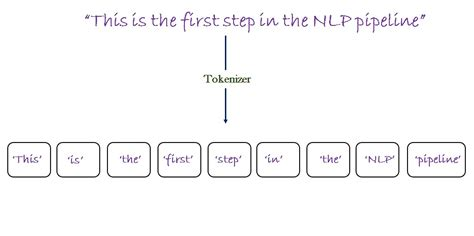

2. *Длина текста*:

    Модели машинного обучения принимают входные данные постоянного, фиксированного размера (для языковых моделей он называется окном контекста). Размер переводимого текста, напротив, не должен быть ничем ограничен. Можно подойти к этой проблеме со стороны алгоритмов векторизации, но такой подход показал себя не вполне продуктивным - очевидно, текст нельзя сжимать неограниченно. 
    
    Поэтому языковые модели на самом деле выполняют отображение:
    $$\mathcal{M}: (x_i ... x_{i+W}) \to (y_i ... y_{i+W}) $$
    Где $\{x_j\}, \{y_j\}$ - наборы токенов текста. В случае, если длина текста в токенах больше чем окно контекста, окно контекста будет сдвигаться по мере перевода, а если меньше - то дополняться пустыми токенами.

    На практике более удобно обучать отображения вида:
    $$\mathcal{M}: (x_i ... x_{i+W}),(y_i ... y_{i+W}) \to y_{i+W+1} $$
    поскольку:
    - Никто не гарантирует, что переведённый текст будет иметь такое же количество токенов как исходный. Это создаёт лишние проблемы при обучении и инференсе. Новая схема лишена 
    этого недостатка;
    - Нужно предсказывать не всё окно контекста сразу, а всего один токен (или несколько - в случае Multi-Token моделей), а токенов на входе при этом получается больше - задача проще.

3. *Память*:

    Чтобы адекватно пререводить текст, нужно выучить миллионы сочетаний слов (токенов), их смысл, грамматические правила, исключения и т.д.

**Задача генерации/дополнения текста**

Постановка задачи генерации текста в целом похожа

1. *Входные данные*: 

    Исходный текст $(x_1, x_2, \ldots, x_n)$, который необходимо дополнить

2. *Выходные данные*: 
    
    Продолжение текста $(x_{n+1}, x_{n+2}, \ldots, x_{n+k})$,

3. *Генеративная модель*:

    Предсказывает один или несколько следующих токенов текста:
    $$\mathcal{M}: (x_i ... x_{i+W}) \to x_{i+W+1} $$
    Текст генерируется путём рекурсивного применения данного отображения. Остановка генерации происходит за счёт специального токена - токена остановки генерации.

4. *Данные для обучения*:

    В целом, любые тексты, релевантные предметной области модели.

Основные проблемы при решении задачи генерации текста в целом такие же, как при машинном переводе.

**Недостатки классических моделей в решении задач обработки языка**

![alt text](L1_f01_nn_architectures.jpg)

| **Тип модели** | Плюсы | Минусы |
|------------|-------|--------|
| **FCNN** | - Простая архитектура, легко реализуется. <br> - Хорошо подходит для небольших наборов данных. <br> - Может обучаться сложным функциям. | - Неэффективна для высокоразмерных данных. <br> - Склонна к переобучению при больших наборах данных. <br> - Не имеет ни пространственного, ни временного восприятия. |
| **CNN** | - Свертки позволяют эффективно обрабатывать данные большой размерности малым числом параметров. <br> - Эффективно захватывает локальные паттерны. | - Менее эффективна для последовательных данных. <br> - Может плохо захватывать дальние зависимости. |
| **RNN** | - Хорошо захватывает зависимости в последовательных данных. <br> - Может обрабатывать входные данные переменной длины. | - Склонны к проблеме исчезающего градиента. <br> - Рекуррентные блоки плохо параллелятся (т.к. входы зависят от прошлых выходов). <br> - Ограниченная память о прошлых входах. |
| **AE** |  - Формирует компактные представления данных. <br> - Хорошо обнаруживает аномалии данных. | - Требует тщательной настройки архитектуры. <br> - Может плохо обобщаться для новых данных. |


# 1. Архитектура seq2seq. Механизм Attention.

Для решения проблем с обработкой последовательностей переменной длины, особенно в задачах машинного перевода, была предложена архитектура **sequence-to-sequence (seq2seq)**. Она состоит из двух основных компонентов:

1.  **Энкодер (Encoder)**: Это рекуррентная нейронная сеть (часто LSTM или GRU), которая принимает на вход последовательность токенов $(x_1, x_2, 
, x_n)$ и сжимает её в один вектор фиксированной длины, называемый **вектором контекста** (context vector). Этот вектор должен содержать в себе всю суть входной последовательности.
2.  **Декодер (Decoder)**: Это другая рекуррентная нейронная сеть, которая инициализируется вектором контекста от энкодера и генерирует выходную последовательность токенов $(y_1, y_2, 
, y_m)$ шаг за шагом.

Энкодер читает входное предложение и создает "смысловой" вектор, а декодер использует этот вектор, чтобы сформировать переведённое предложение.

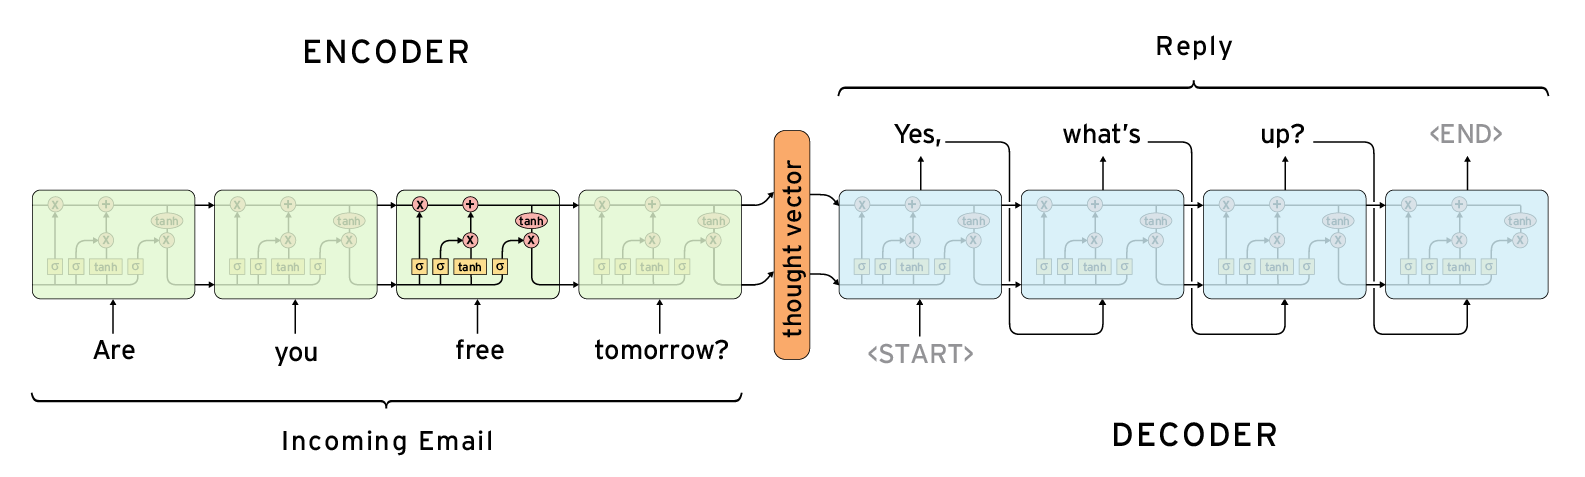

### Проблема "бутылочного горлышка"

Хотя архитектура seq2seq стала большим шагом вперед, у нее есть серьезный недостаток. Вся информация из входной последовательности, независимо от ее длины, должна быть сжата в один-единственный вектор контекста. Это создает **"бутылочное горлышко" (bottleneck)**:

-   Для длинных предложений энкодеру сложно запомнить всю информацию.
-   Ранние части последовательности могут быть "забыты" к моменту обработки конца.

Это приводит к тому, что качество перевода значительно падает с увеличением длины предложения. Чтобы решить эту проблему, был предложен **механизм внимания (attention mechanism)**.

### Механизм внимания (Attention Mechanism)

Идея механизма внимания, впервые предложенного в контексте машинного перевода, заключается в том, чтобы позволить декодеру на каждом шаге генерации "обращать внимание" на разные части входной последовательности, а не полагаться только на один фиксированный вектор контекста.

Вместо того чтобы сжимать всю входную последовательность в один вектор, энкодер предоставляет декодеру все свои скрытые состояния $(h_1, h_2,\ldots, h_n)$ по одному для каждого входного токена. 

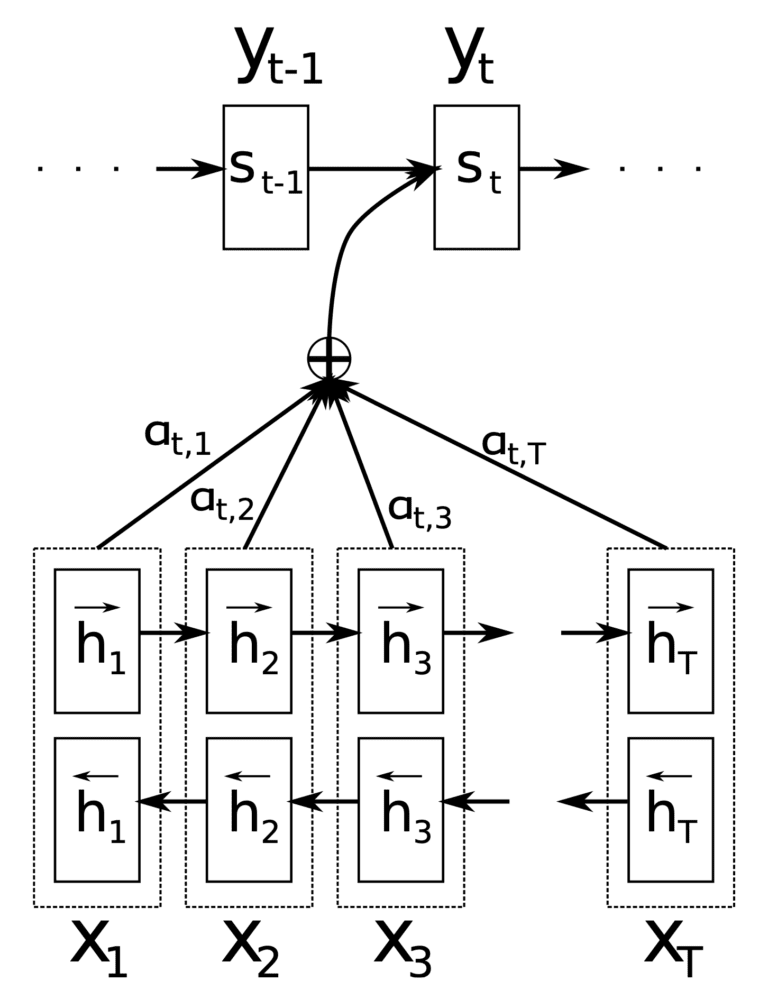

Здесь:
- $\bar{h}_{t}=f_e(x_t, \bar{h}_{t-1})$ -вектор аннотаций на шаге t;
- $s_{t}=f_d(s_t, y_{t-1},c_t)$ - скрытое состояние декодера на временном шаге t
- $c_{t}=q({\bar{h}_1 ... \bar{h}_T})$ - вектор контекста на временном шаге t. Он рассчитывается на каждом шаге для предсказания целевого слова $y_t=g(s_t, c_t, y_{t-1})$


На каждом шаге генерации выходной последовательности декодер выполняет следующие действия:

**Шаг 1: Вычисление "оценок" (Alignment Scores)**

Декодер, находясь в своем текущем скрытом состоянии $s_t$, сравнивает его со всеми скрытыми состояниями энкодера $h_i$. Результатом сравнения является "оценка" $e_{ti}$, которая показывает, насколько входной токен $i$ важен для генерации текущего выходного токена $t$. Существует несколько способов вычисления этой оценки, один из самых распространенных (внимание Баданау) использует небольшую нейронную сеть:

$$e_{ti} = v_a^T \tanh(W_a s_t + U_a h_i)$$

Где $W_a$, $U_a$ и $v_a$ — обучаемые веса.

**Шаг 2: Получение весов внимания (Attention Weights)**

Оценки $e_{ti}$ преобразуются в вероятностное распределение с помощью функции `softmax`. Полученные значения $\alpha_{ti}$ называются **весами внимания**. Они показывают, на какую часть входного предложения нужно "сосредоточиться" в данный момент.

$$\alpha_{ti} = \frac{\exp(e_{ti})}{\sum_{k=1}^n \exp(e_{tk})}$$

Сумма всех весов $\alpha_{ti}$ по $i$ равна 1.

**Шаг 3: Вычисление вектора контекста (Context Vector)**

Вектор контекста $c_t$ для текущего шага вычисляется как взвешенная сумма всех скрытых состояний энкодера. Весами выступают полученные на предыдущем шаге веса внимания $\alpha_{ti}$.

$$c_t = \sum_{i=1}^n \alpha_{ti} h_i$$

Этот вектор контекста является динамическим — он создается заново для каждого шага декодера и содержит информацию из входной последовательности, наиболее релевантную для текущего шага генерации.

